In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
img = cv.imread('Lenna.png')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray =  cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
hist = cv.calcHist([img_gray],[0],None,[256],[0,256])

In [3]:
img_eq = cv.equalizeHist(img_gray)
hist_eq = cv.calcHist([img_eq],[0],None,[256],[0,256])

cl = cv.createCLAHE(3.0,(8,8))
img_ad_eq = cl.apply(img_gray)
hist_ad_eq = cv.calcHist([img_ad_eq],[0],None,[256],[0,256])

In [4]:
gaussian_noise = np.zeros((img_gray.shape[0],img_gray.shape[1]),dtype = np.uint8)
cv.randn(gaussian_noise,128,20)

gaussian_noise = (gaussian_noise*0.7).astype(np.uint8)
noise_img = cv.add(img_gray,gaussian_noise)

In [5]:
uniform_noise = np.zeros((img_gray.shape[0],img_gray.shape[1]),dtype = np.uint8)
cv.randu(uniform_noise,0,255)
uniform_noise = (uniform_noise*0.7).astype(np.uint8)
uf_noise_img = cv.add(img_gray,uniform_noise)

In [9]:
g_blur = cv.GaussianBlur(noise_img,(5,5),0.5)
m_blur = cv.medianBlur(uf_noise_img,5)

In [11]:
#Bilateral Filter
new_img = uniform_noise.copy()
ret,new_img = cv.threshold(uniform_noise,88,225,cv.THRESH_BINARY)
uf_bin_new = cv.add(img_gray,new_img)
uf_bsm = cv.bilateralFilter(uf_noise_img,3,15,15)

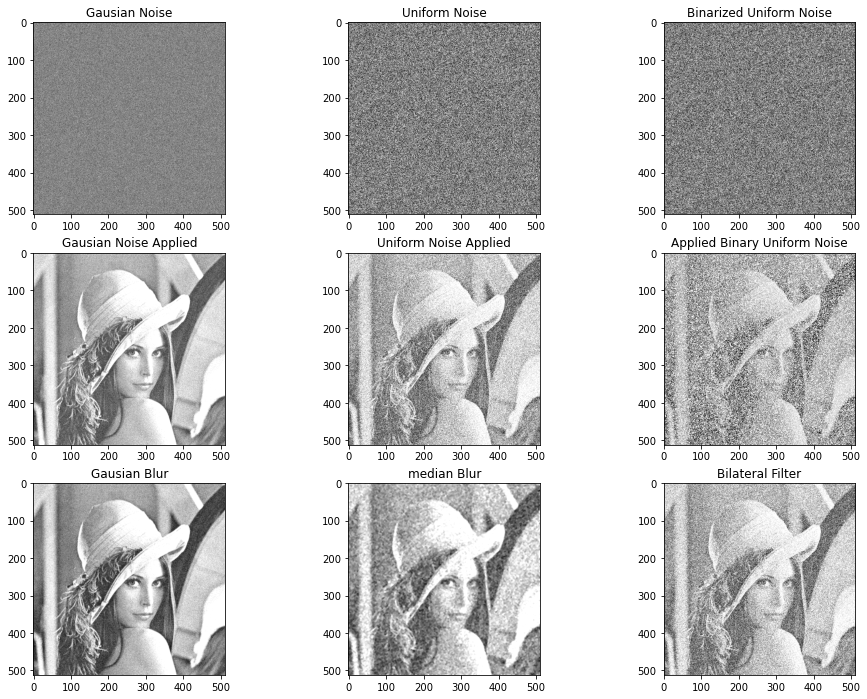

In [13]:
row,col = 3,3
fig = plt.figure(figsize=(16,12))
gs = GridSpec(row,col)

fig.add_subplot(gs[0,0])
plt.title("Gausian Noise")
plt.imshow(gaussian_noise,cmap='gray')

fig.add_subplot(gs[0,1])
plt.title('Uniform Noise')
plt.imshow(uniform_noise,cmap='gray')

fig.add_subplot(gs[0,2])
plt.title('Binarized Uniform Noise')
plt.imshow(uniform_noise,cmap='gray')


fig.add_subplot(gs[1,0])
plt.title('Gausian Noise Applied')
plt.imshow(noise_img,cmap='gray')

fig.add_subplot(gs[1,1])
plt.title('Uniform Noise Applied')
plt.imshow(uf_noise_img,cmap='gray')

fig.add_subplot(gs[1,2])
plt.title('Applied Binary Uniform Noise')
plt.imshow(uf_bin_new,cmap='gray')

fig.add_subplot(gs[2,0])
plt.title('Gausian Blur')
plt.imshow(g_blur,cmap='gray')

fig.add_subplot(gs[2,1])
plt.title('median Blur')
plt.imshow(m_blur,cmap='gray')

fig.add_subplot(gs[2,2])
plt.title('Bilateral Filter')
plt.imshow(uf_bsm,cmap='gray')
plt.savefig('1.jpg')
plt.show()

In [14]:
# Canny Edge Detection 
canny_img = cv.Canny(img_gray,89,190)

#Sobel
grad_x = cv.Sobel(img_gray,cv.CV_64F,1,0)
grad_y = cv.Sobel(img_gray,cv.CV_64F,0,1)
grad = np.sqrt(grad_x**2 + grad_y**2)
grad_norm = (grad*255 / grad.max()).astype(np.uint8)

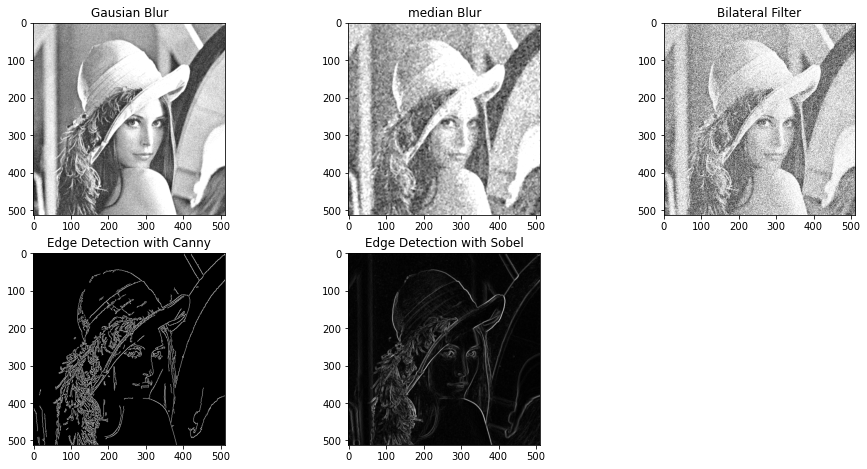

In [28]:
row,col = 3,3
fig = plt.figure(figsize=(16,12))
gs = GridSpec(row,col)


fig.add_subplot(gs[0,0])
plt.title('Gausian Blur')
plt.imshow(g_blur,cmap='gray')

fig.add_subplot(gs[0,1])
plt.title('median Blur')
plt.imshow(m_blur,cmap='gray')

fig.add_subplot(gs[0,2])
plt.title('Bilateral Filter')
plt.imshow(uf_bsm,cmap='gray')

fig.add_subplot(gs[1,0])
plt.title('Edge Detection with Canny')
plt.imshow(canny_img,cmap='gray')

fig.add_subplot(gs[1,1])
plt.title('Edge Detection with Sobel')
plt.imshow(grad_norm,cmap='gray')

plt.savefig('2.jpg')
plt.show()

In [17]:
# Template Matching
foot_path = 'football.jpg'
fielder_path = 'fl1.jpeg'

img1 = cv.imread(foot_path)
img2 = cv.imread(fielder_path)

h,w,c = img1.shape

img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

img2c = img2.copy()

result = cv.matchTemplate(img2c,img1,cv.TM_CCOEFF)
min_val,max_val,min_loc,max_loc = cv.minMaxLoc(result)

print(f'min_location: {min_loc}\nmax_location: {max_loc}')

min_location: (68, 6)
max_location: (22, 29)


In [18]:
foot_path = 'football.jpg'
fielder_path = 'fl1.jpeg'

img1 = cv.imread(foot_path)
img2 = cv.imread(fielder_path)

h,w,c = img1.shape

img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

img2c = img2.copy()

result = cv.matchTemplate(img2c,img1,cv.TM_CCOEFF)
min_val,max_val,min_loc,max_loc = cv.minMaxLoc(result)

print(f'min_location: {min_loc}\nmax_location: {max_loc}')

min_location: (68, 6)
max_location: (22, 29)


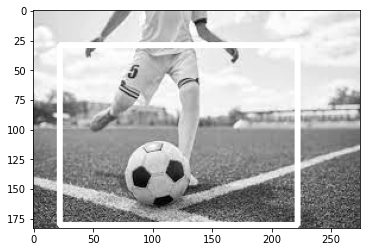

In [27]:
topleft = max_loc
bottom_right = [topleft[0] + w, topleft[1] + h]
cv.rectangle(img2c,topleft,bottom_right,255,3)
plt.imshow(img2c,cmap='gray')
plt.savefig('3.jpg')
plt.show()